## Read Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/My Drive/research_projects_NYUAD/US_China_AI/code/Github/Main/Figure1/"

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

#get the c2 values
df = pd.read_csv(path+"/figure1_data_impact.csv")

#get the novelty values
novelty = pd.read_csv(path+"/figure1_data_novelty.csv")
country_novelty = df.merge(novelty, on="PID")
country_novelty = country_novelty[country_novelty.median_zscore<0]
#convert novelty to positive values
country_novelty.loc[:,'median_zscore'] = country_novelty.loc[:,'median_zscore'] * -1

#get the number of AI scientists (this file was generated on the HPC)
scientists = pd.read_csv(path+"/figure1_data_scientists.csv")

##Plot

<ipython-input-4-e0cbc5e700f9>:68: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  country_hit.c_2 = country_hit.c_2/int(count)
<ipython-input-4-e0cbc5e700f9>:178: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  country_novelty2.median_zscore = country_novelty2.median_zscore/int(count)


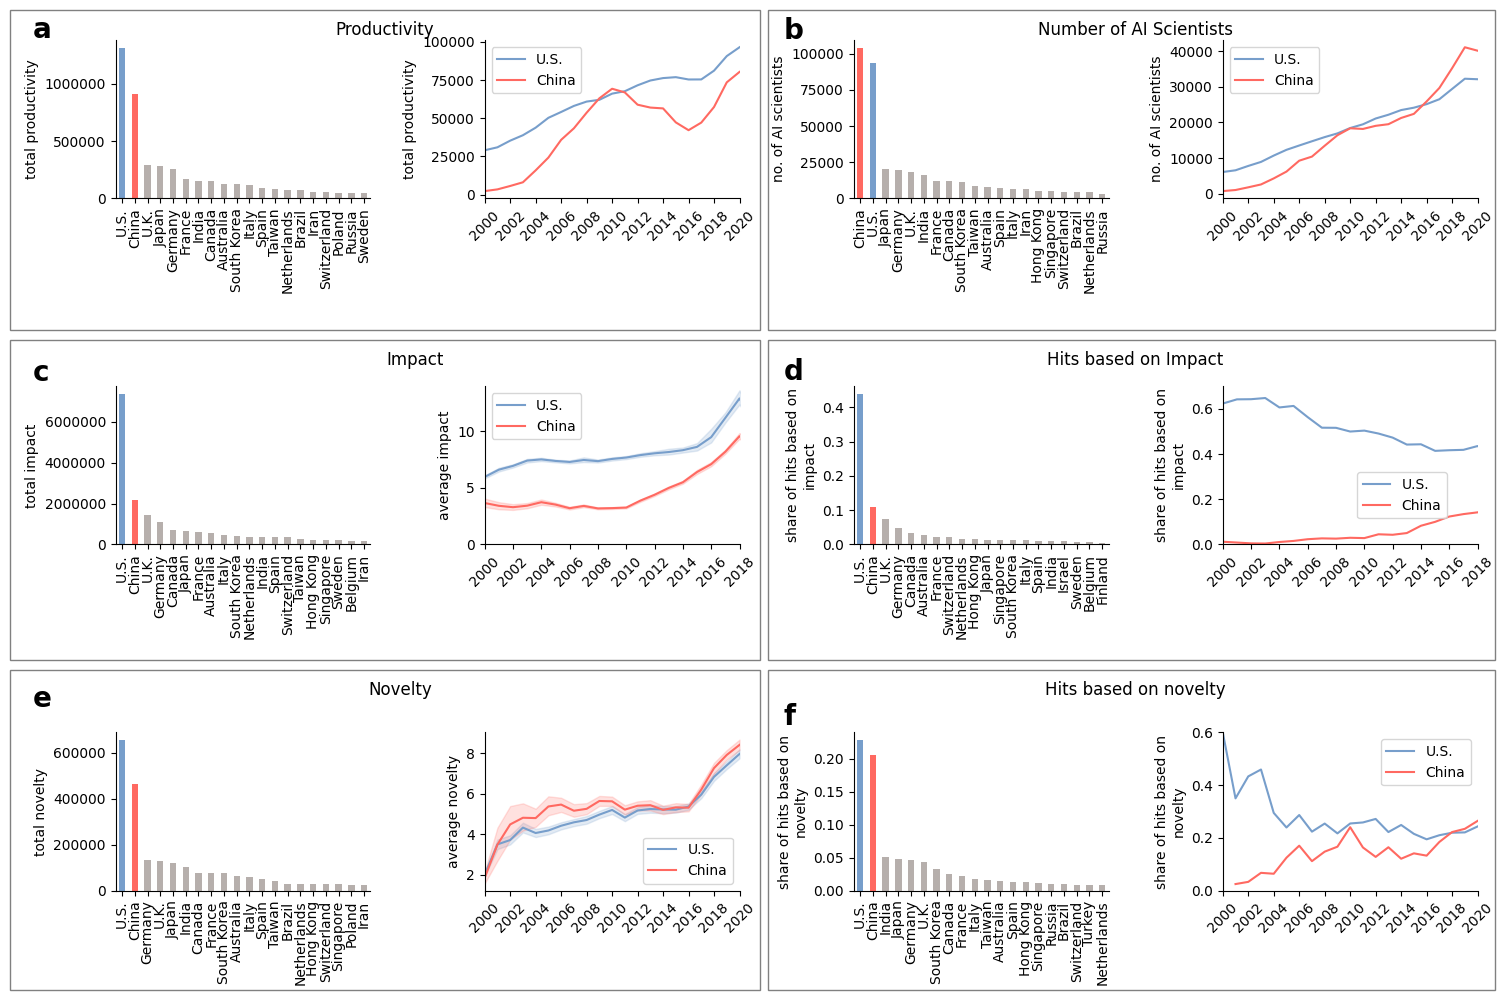

In [4]:
import seaborn as sns

us_color = '#779ECB'#'#829460'
china_color = '#FF6961'#'#E98EAD'
other_color = '#B6AFAC'#'#8B7E74'#'#4472c4'

labelfontsize = 12
tickfontsize = 10
titlefontsize = 12

fig, ((ax9, ax10, ax11, ax12), (ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(3,4, figsize=(15,10))

#we only look at the last 20 years
df = df[df.PubYear.ge(2000) & df.PubYear.le(2020)]

### Impact top 20
country_imp = df[['Country','c_2']].groupby('Country').sum().reset_index().sort_values(by="c_2", ascending=False).rename(columns={"c_2":"Impact"})

country_imp.head(20).plot.bar(x='Country', y="Impact", rot=90, legend=False, ax=ax1, color=[us_color, china_color] + [other_color] * 18)

labels = ax1.get_xticklabels()

for label in labels:
  l = label.get_text()
  if l == "United States":
    label.set_text("U.S.")
  elif l == "United Kingdom":
    label.set_text("U.K.")

ax1.set_xticklabels(labels, rotation=90)

ax1.set_ylabel("total impact")
ax1.set_xlabel("")
ax1.ticklabel_format(style='plain', axis='y')


ax1.text(-7,8000000, "c", fontsize=20, fontweight='bold')
plt.figtext(0.25,0.97,"Productivity", va="center", ha="center", size=titlefontsize)

### Impact overtime
df1 = df[df.Country=="United States"]
df2 = df[df.Country=="China"]

sns.lineplot(data=df1, x="PubYear", y="c_2", label="U.S.", color=us_color, ax=ax2)
sns.lineplot(data=df2, x="PubYear", y="c_2", label="China", color=china_color, ax=ax2)

ax2.set_xlim(2000,2018)
ax2.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
ax2.set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018], rotation=45)
ax2.set_ylim(0,14)
ax2.legend()

ax2.set_xlabel("")
ax2.set_ylabel('average impact')

## Add rectangle frame

#(lower-left corner), width, height
rec = plt.Rectangle((0.0, 0.67), 0.5, 0.32,fill=False,lw=1,zorder=1000, transform=fig.transFigure, figure=fig, edgecolor="grey")
fig.patches.extend([rec])

### Impact hits top 20
thresh = df.c_2.quantile(.99) #US and China remain top 2 for .95,.9,.5
count = df[['c_2']][df.c_2>=thresh].count()
country_hit = df[['Country','c_2']][df.c_2>=thresh].groupby('Country').count().reset_index().sort_values(by="c_2", ascending=False)
country_hit.c_2 = country_hit.c_2/int(count)

country_hit.head(20).plot.bar(x='Country', y="c_2", rot=90, legend=False, ax=ax3, color=[us_color, china_color] + [other_color] * 18)

labels = ax3.get_xticklabels()

for label in labels:
  l = label.get_text()
  if l == "United States":
    label.set_text("U.S.")
  elif l == "United Kingdom":
    label.set_text("U.K.")

ax3.set_xticklabels(labels, rotation=90)

ax3.set_ylabel("share of hits based on\nimpact")
ax3.set_xlabel("")
ax3.ticklabel_format(style='plain', axis='y')

ax3.text(-6, 0.48, "d", fontsize=20, fontweight='bold')
plt.figtext(0.75,0.97,"Number of AI Scientists", va="center", ha="center", size=titlefontsize)

### Impact hits overtime
thresh = df[['PubYear','c_2']].groupby('PubYear').quantile(.99).reset_index().rename(columns={'c_2':'yearly_thresh'})
temp = df.merge(thresh, on="PubYear")

hits = temp[temp.c_2>=temp.yearly_thresh]
total_hits = temp[temp.c_2>=temp.yearly_thresh][['PID','PubYear']].groupby('PubYear').count().reset_index().rename(columns={'PID':'yearly_total_hits'})

hits = hits[['PubYear','Country','PID']].groupby(['PubYear','Country']).count().reset_index().rename(columns={'PID':'hits_count'})
hits = hits.merge(total_hits, on="PubYear")
hits['hits_share'] = hits.hits_count/hits.yearly_total_hits

df1 = hits[hits.Country=="United States"]
df2 = hits[hits.Country=="China"]

sns.lineplot(data=df1, x="PubYear", y="hits_share", label="U.S.", color=us_color, ax=ax4)
sns.lineplot(data=df2, x="PubYear", y="hits_share", label="China", color=china_color, ax=ax4)

ax4.set_xlim(2000,2018)
ax4.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
ax4.set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018], rotation=45)
ax4.set_ylim(0,.7)
ax4.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

ax4.set_xlabel("")
ax4.set_ylabel('share of hits based on\nimpact')

## Add rectangle frame

#(lower-left corner), width, height
rec = plt.Rectangle((0.505, 0.67), 0.485, 0.32,fill=False,lw=1,zorder=1000, transform=fig.transFigure, figure=fig, edgecolor="grey")
fig.patches.extend([rec])

### Novelty top 20

country_novelty2 = country_novelty[['Country','median_zscore']].groupby("Country").sum().reset_index().sort_values(by="median_zscore", ascending=False)

country_novelty2.head(20).plot.bar(x='Country', y="median_zscore", rot=90, legend=False, ax=ax5, color=[us_color, china_color] + [other_color] * 18)

labels = ax5.get_xticklabels()

for label in labels:
  l = label.get_text()
  if l == "United States":
    label.set_text("U.S.")
  elif l == "United Kingdom":
    label.set_text("U.K.")

ax5.set_xticklabels(labels, rotation=90)

ax5.set_ylabel("total novelty")
ax5.set_xlabel("")
ax5.ticklabel_format(style='plain', axis='y')

ax5.text(-7,800000, "e", fontsize=20, fontweight='bold')
plt.figtext(0.27,0.64,"Impact", va="center", ha="center", size=titlefontsize)

### Novelty overtime
df1 = country_novelty[country_novelty.Country=="United States"]
df2 = country_novelty[country_novelty.Country=="China"]

sns.lineplot(data=df1, x="PubYear", y="median_zscore", label="U.S.", color=us_color, ax=ax6)
sns.lineplot(data=df2, x="PubYear", y="median_zscore", label="China", color=china_color, ax=ax6)

ax6.set_xlim(2000,2020)
ax6.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
ax6.set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020], rotation=45)
ax6.legend(loc=4)

ax6.set_xlabel("")
ax6.set_ylabel('average novelty')

## Add rectangle frame

#(lower-left corner), width, height
rec = plt.Rectangle((0.0, 0.34), 0.5, 0.32,fill=False,lw=1,zorder=1000, transform=fig.transFigure, figure=fig, edgecolor="grey")
fig.patches.extend([rec])


### Novelty hits top 20
thresh = country_novelty.median_zscore.quantile(.99)  #US and China remain top 2 for .95 and .9
count = country_novelty[['median_zscore']][country_novelty.median_zscore>=thresh].count()

country_novelty2 = country_novelty[['Country','median_zscore']][country_novelty.median_zscore>=thresh].groupby('Country').count().reset_index().sort_values(by="median_zscore", ascending=False)

country_novelty2.median_zscore = country_novelty2.median_zscore/int(count)

country_novelty2.head(20).plot.bar(x='Country', y="median_zscore", rot=90, legend=False, ax=ax7, color=[us_color, china_color] + [other_color] * 18)

labels = ax7.get_xticklabels()

for label in labels:
  l = label.get_text()
  if l == "United States":
    label.set_text("U.S.")
  elif l == "United Kingdom":
    label.set_text("U.K.")

ax7.set_xticklabels(labels, rotation=90)
ax7.set_ylabel("share of hits based on\nnovelty")
ax7.set_xlabel("")
ax7.ticklabel_format(style='plain', axis='y')

ax7.text(-6,0.25, "f", fontsize=20, fontweight='bold')
plt.figtext(0.75,0.64,"Hits based on Impact", va="center", ha="center", size=titlefontsize)

## Novelty hits overtime

thresh = country_novelty[['PubYear','median_zscore']].groupby('PubYear').quantile(.99).reset_index().rename(columns={'median_zscore':'yearly_thresh'})  #US and China remain top 2 for .95,.9,.5

novelty2 = country_novelty.merge(thresh, on="PubYear")

topnovel = novelty2[novelty2.median_zscore>=novelty2.yearly_thresh]
total_topnovel = novelty2[novelty2.median_zscore>=novelty2.yearly_thresh][['PID','PubYear']].groupby('PubYear').count().reset_index().rename(columns={'PID':'yearly_total_topnovel'})

topnovel = topnovel[['PubYear','Country','PID']].groupby(['PubYear','Country']).count().reset_index().rename(columns={'PID':'topnovel_count'})
topnovel = topnovel.merge(total_topnovel, on="PubYear")
topnovel['topnovel_share'] = topnovel.topnovel_count/topnovel.yearly_total_topnovel

df1 = topnovel[topnovel.Country=="United States"]
df2 = topnovel[topnovel.Country=="China"]

sns.lineplot(data=df1, x="PubYear", y="topnovel_share", label="U.S.", color=us_color, ax=ax8)
sns.lineplot(data=df2, x="PubYear", y="topnovel_share", label="China", color=china_color, ax=ax8)

ax8.set_xlim(2000,2020)
ax8.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
ax8.set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020], rotation=45)
ax8.set_ylim(0,.6)
ax8.legend()

ax8.set_xlabel("")
ax8.set_ylabel("share of hits based on\nnovelty")

## Add rectangle frame

#(lower-left corner), width, height
rec = plt.Rectangle((0.505, 0.34), 0.485, 0.32,fill=False,lw=1,zorder=1000, transform=fig.transFigure, figure=fig, edgecolor="grey")
fig.patches.extend([rec])

### Productivity top 20
country_prod = df[['Country','PID']].groupby('Country').count().reset_index().sort_values(by="PID", ascending=False).rename(columns={"PID":"Productivity"})

country_prod.head(20).plot.bar(x='Country', y="Productivity", legend=False, ax=ax9, color=[us_color, china_color] + [other_color] * 18)
labels = ax9.get_xticklabels()

for label in labels:
  l = label.get_text()
  if l == "United States":
    label.set_text("U.S.")
  elif l == "United Kingdom":
    label.set_text("U.K.")

ax9.set_xticklabels(labels, rotation=90)

ax9.set_ylabel("total productivity")
ax9.set_xlabel("")
ax9.ticklabel_format(style='plain', axis='y')

ax9.text(-7,1400000, "a", fontsize=20, fontweight='bold')
plt.figtext(0.26,0.31,"Novelty", va="center", ha="center", size=titlefontsize)

### Productivity overtime
df1 = df[['PubYear','PID','Country']].drop_duplicates().groupby(['PubYear','Country']).count().reset_index().rename(columns={'PID':'num_Papers'})

ax10.plot(df1[df1.Country=="United States"].PubYear, df1[df1.Country=="United States"].num_Papers, label="U.S.", c=us_color)
ax10.plot(df1[df1.Country=="China"].PubYear, df1[df1.Country=="China"].num_Papers, label="China", c=china_color)

ax10.set_xlim(2000,2020)
ax10.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
ax10.set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020], rotation=45)
ax10.legend()

ax10.set_xlabel("")
ax10.set_ylabel('total productivity')

## Add rectangle frame

#(lower-left corner), width, height
rec = plt.Rectangle((0.0, 0.01), 0.5, 0.32,fill=False,lw=1,zorder=1000, transform=fig.transFigure, figure=fig, edgecolor="grey")
fig.patches.extend([rec])


### total AI scientists
df1 = scientists[['AID','Country']].drop_duplicates().groupby(['Country']).count().reset_index().rename(columns={'AID':'num_Authors'}).sort_values(by='num_Authors', ascending=False)

df1.head(20).plot.bar(x='Country', y="num_Authors", rot=90, legend=False, ax=ax11, color=[china_color,us_color] + [other_color] * 18)

labels = ax11.get_xticklabels()

for label in labels:
  l = label.get_text()
  if l == "United States":
    label.set_text("U.S.")
  elif l == "United Kingdom":
    label.set_text("U.K.")

ax11.set_xticklabels(labels, rotation=90)

ax11.set_ylabel("no. of AI scientists")
ax11.set_xlabel("")

ax11.ticklabel_format(style='plain', axis='y')

ax11.text(-6,110000, "b", fontsize=20, fontweight='bold')


plt.figtext(0.75,0.31,"Hits based on novelty", va="center", ha="center", size=titlefontsize)

### Scientists overtime
df1 = scientists[['Year','AID','Country']].drop_duplicates().groupby(['Year','Country']).count().reset_index().rename(columns={'AID':'num_Authors'})

ax12.plot(df1[df1.Country=="United States"].Year, df1[df1.Country=="United States"].num_Authors, label="U.S.", c=us_color)
ax12.plot(df1[df1.Country=="China"].Year, df1[df1.Country=="China"].num_Authors, label="China", c=china_color)

ax12.set_xlim(2000,2020)
ax12.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
ax12.set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020], rotation=45)
ax12.legend()

ax12.set_xlabel("")
ax12.set_ylabel('no. of AI scientists')

## Add rectangle frame
rec = plt.Rectangle((0.505, 0.01), 0.485, 0.32,fill=False,lw=1,zorder=1000, transform=fig.transFigure, figure=fig, edgecolor="grey")
fig.patches.extend([rec])

ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
ax3.spines[['right', 'top']].set_visible(False)
ax4.spines[['right', 'top']].set_visible(False)
ax5.spines[['right', 'top']].set_visible(False)
ax6.spines[['right', 'top']].set_visible(False)
ax7.spines[['right', 'top']].set_visible(False)
ax8.spines[['right', 'top']].set_visible(False)
ax9.spines[['right', 'top']].set_visible(False)
ax10.spines[['right', 'top']].set_visible(False)
ax11.spines[['right', 'top']].set_visible(False)
ax12.spines[['right', 'top']].set_visible(False)



plt.tight_layout(h_pad=2.5)
plt.show()